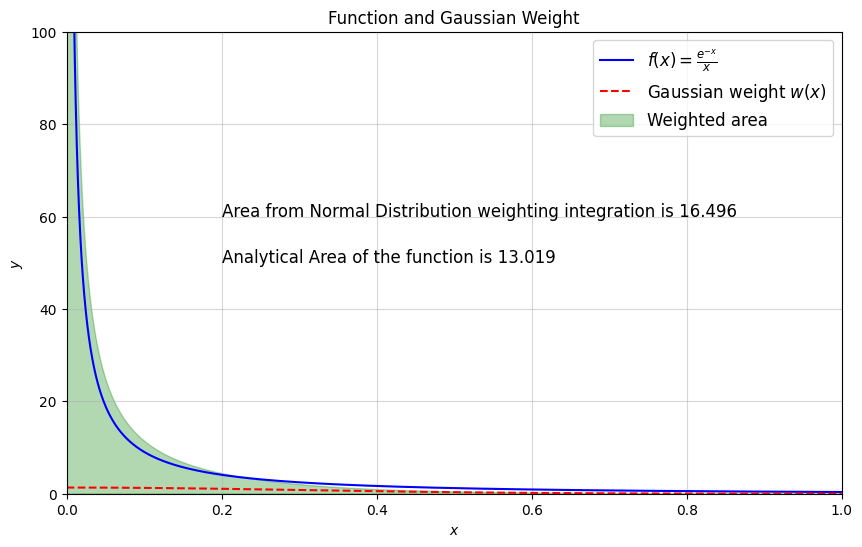

In [2]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.integrate import quad


# Define the integrand function
def f(x):
    return np.exp(-x) / x

# Define the Gaussian weight function
def gaussian_weight(x, mu, sigma):
    return norm.pdf(x, loc=mu, scale=sigma)

# Define the weighted integrand
def weighted_integrand(x, mu, sigma):
    return f(x) * gaussian_weight(x, mu, sigma)

# Integration limits
a, b = 1e-6, 1
N = 10000

# Initialise parameters
x = np.linspace(a, b, N)
y = f(x)


# Set parameters for the Normal distribution
mu = a  # Mean

fn = 1 + (x ** 2)
sigma = np.std(fn)  # Standard Deviation

# Set the Gaussian Weight
weight = gaussian_weight(x, mu, sigma)

# Evaluate the integral numerically using the Normal weight function
integral_value, _ = quad(weighted_integrand, a, b, args=(mu, sigma))
analytic_area, _ = quad(f, a, b)

plt.figure(figsize=(10, 6))
plt.plot(x, y, label=r"$f(x) = \frac{e^{-x}}{x}$", color='blue')
plt.plot(x, weight, label="Gaussian weight $w(x)$", color='red', linestyle='--')
plt.fill_between(x, 0, y * weight, color='green', alpha=0.3, label="Weighted area")
plt.text(0.2, 60, f"Area from Normal Distribution weighting integration is {integral_value:0.3f}", fontsize = 12)
plt.text(0.2, 50, f"Analytical Area of the function is {analytic_area:0.3f}", fontsize = 12)
plt.title("Function and Gaussian Weight")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.xlim(0, 1)
plt.ylim(0, 100)
plt.legend(fontsize=12)
plt.grid(alpha=0.5)
plt.show()